Le taux de désabonnement des clients se produit lorsque les clients ou les abonnés cessent de faire affaire avec une entreprise ou un service. 

Une entreprise veut savoir quels sont les clients qui vont se désabonner en examinant certains des attributs importants et en y appliquant le Machine Learning ou le Deep Learning.

# I - Traitement, Visualisation et Analyse des données

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import PredefinedSplit
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models

In [2]:
taux= pd.read_csv('./data.csv', sep = ",")
taux

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Preparation du dataset

In [3]:
#Suppression des colonnes num_ligne et ID_Client,nom
taux.drop('num_ligne', axis=1, inplace = True)
taux.drop('ID_Client', axis=1, inplace = True)
taux.drop('Nom', axis=1, inplace = True)
taux.head()

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#nom des labels colonnes
taux.count()

Score_Credit      10000
Pays              10000
Sex               10000
Age               10000
Tenure            10000
Balance           10000
Num_Produit       10000
il_a_CrCard       10000
Membre_actif      10000
Salaire_estime    10000
Exited            10000
dtype: int64

In [5]:
print(taux.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Score_Credit    10000 non-null  int64  
 1   Pays            10000 non-null  object 
 2   Sex             10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   Num_Produit     10000 non-null  int64  
 7   il_a_CrCard     10000 non-null  int64  
 8   Membre_actif    10000 non-null  int64  
 9   Salaire_estime  10000 non-null  float64
 10  Exited          10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


## 2 ANALYSE DES MANQUANTS

Qu’est ce qu’une donnée manquante?

Les algorithmes de Machine Learning prennent les données d’entrée (input Data) sous forme matricielle, chaque ligne est une observation, et chaque colonne représente une caractéristique (feature) de l’indivu (son salaire, appartenance politique etc…).

On dit qu’une observation (ligne de la matrice de données) comporte une donnée manquante s’il existe une feature pour laquelle sa valeur n’est pas renseignée. Evidemment, on peut avoir plusieurs données manquantes pour une même observation.


In [6]:
#vue d'ensemble des valeurs manquantes
def num_missing(X):
    return sum(X.isnull())

# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(taux.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne

# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(taux.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne


Valeurs manquantes par colonne:
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    0
dtype: int64


Il semble ne pas y avoir de valeurs manquantes dans nos données

In [7]:
var = taux.isnull()
print(var)

      Score_Credit   Pays    Sex    Age  Tenure  Balance  Num_Produit  \
0            False  False  False  False   False    False        False   
1            False  False  False  False   False    False        False   
2            False  False  False  False   False    False        False   
3            False  False  False  False   False    False        False   
4            False  False  False  False   False    False        False   
...            ...    ...    ...    ...     ...      ...          ...   
9995         False  False  False  False   False    False        False   
9996         False  False  False  False   False    False        False   
9997         False  False  False  False   False    False        False   
9998         False  False  False  False   False    False        False   
9999         False  False  False  False   False    False        False   

      il_a_CrCard  Membre_actif  Salaire_estime  Exited  
0           False         False           False   False  
1      

In [8]:
var2 = taux[var.any(axis=1)] #verifie les valeurs où il y a le true
print(var2)
taux.fillna(0)

Empty DataFrame
Columns: [Score_Credit, Pays, Sex, Age, Tenure, Balance, Num_Produit, il_a_CrCard, Membre_actif, Salaire_estime, Exited]
Index: []


,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##  3 Exploration des variables quantitatives

### Afficher la liste des variables quantitatives dans le jeu de données

In [9]:

numerical = [var for var in taux.columns if taux[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Score_Credit', 'Age', 'Tenure', 'Balance', 'Num_Produit', 'il_a_CrCard', 'Membre_actif', 'Salaire_estime', 'Exited']


# Visualisons le contenu des variables quantitatives dans le jeu de données

In [10]:
taux[numerical].head()

,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


### Afficher le résumé statistique des variables quantitatives (describe())

In [11]:
print(round(taux[numerical].describe()),2)

       Score_Credit      Age   Tenure   Balance  Num_Produit  il_a_CrCard  \
count       10000.0  10000.0  10000.0   10000.0      10000.0      10000.0   
mean          651.0     39.0      5.0   76486.0          2.0          1.0   
std            97.0     10.0      3.0   62397.0          1.0          0.0   
min           350.0     18.0      0.0       0.0          1.0          0.0   
25%           584.0     32.0      3.0       0.0          1.0          0.0   
50%           652.0     37.0      5.0   97199.0          1.0          1.0   
75%           718.0     44.0      7.0  127644.0          2.0          1.0   
max           850.0     92.0     10.0  250898.0          4.0          1.0   

       Membre_actif  Salaire_estime   Exited  
count       10000.0         10000.0  10000.0  
mean            1.0        100090.0      0.0  
std             0.0         57510.0      0.0  
min             0.0            12.0      0.0  
25%             0.0         51002.0      0.0  
50%             1.0     

## 4 Afficher la liste des noms des variables qualitatives

In [12]:
# liste des variables categoriques(il faut les changer en variable quantitatives.)
variables = (taux.dtypes == 'object')
object_cols = list(variables[variables].index)


print('There are {} categorical variables\n'.format(len(object_cols)))

print('The categorical variables are :', object_cols)

There are 2 categorical variables

The categorical variables are : ['Pays', 'Sex']


In [61]:
#Affichage des variables qualitatives

df_cat = taux.select_dtypes(include='object')
print(df_cat)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10000 rows x 0 columns]


In [62]:
# suppression des colonnes d'origine
taux.drop('Pays', axis=1, inplace = True)
taux.drop('Sex', axis=1, inplace = True)
taux.head()

,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [63]:
# Définssion de X et Y

Y = taux.Exited
Y=np.array((Y))

print(Y.shape)

X = taux.loc[:, taux.columns != 'Exited']
print(X.shape)

(10000,)
(10000, 8)


# Mise a l'echelle

In [64]:
print(X)

      Score_Credit  Age  Tenure    Balance  Num_Produit  il_a_CrCard  \
0              619   42       2       0.00            1            1   
1              608   41       1   83807.86            1            0   
2              502   42       8  159660.80            3            1   
3              699   39       1       0.00            2            0   
4              850   43       2  125510.82            1            1   
...            ...  ...     ...        ...          ...          ...   
9995           771   39       5       0.00            2            1   
9996           516   35      10   57369.61            1            1   
9997           709   36       7       0.00            1            0   
9998           772   42       3   75075.31            2            1   
9999           792   28       4  130142.79            1            1   

      Membre_actif  Salaire_estime  
0                1       101348.88  
1                1       112542.58  
2                0      

In [65]:
cols = X.columns

In [66]:
sc = StandardScaler()

X = sc.fit_transform(X)

print(X)

[[-0.32622142  0.29351742 -1.04175968 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  0.19816383 -1.38753759 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418  0.29351742  1.03290776 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.29351742 -0.69598177 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -1.04143285 -0.35020386 ...  0.64609167 -1.03067011
  -1.07636976]]


In [69]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


# Entrainement du modele

In [70]:
# définition des bases d’apprentissages et de tests 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

print(len(X_train), len(X_test))

9000 1000


# Regression logistique

In [71]:
from sklearn.linear_model import LogisticRegression
import time

# entrainement du modele

In [72]:
start = time.time()
model_logistic = LogisticRegression(max_iter=1000, random_state=9).fit(X_train, y_train)
stop = time.time()
total_time = stop - start

print(total_time)

0.1099398136138916


In [73]:
# calcul du score de précision

from sklearn.metrics import accuracy_score
y_pred_log = model_logistic.predict(X_test)

print(accuracy_score(y_test, y_pred_log))

0.808


# Random Forest

In [74]:
start = time.time()

# divison les données en ensembles d'entraînement et de test:
model_forest = RandomForestClassifier(n_estimators=100, random_state=9)
model_forest.fit(X_train, y_train)
stop = time.time()
total_time = stop - start

print(total_time)

3.7019259929656982


In [75]:
#taux de classification

y_pred_rforest = model_forest.predict(X_test)

print(accuracy_score(y_test, y_pred_rforest))

0.859


# SGD classifier

In [76]:
from sklearn.linear_model import SGDClassifier

start = time.time()
model_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)

model_sgd.fit(X_train, y_train)
SGDClassifier(max_iter=5)

stop = time.time()
total_time = stop - start
print(total_time)

0.19988679885864258


In [77]:
#taux de classification

y_pred_sgd = model_sgd.predict(X_test)

print(accuracy_score(y_test, y_pred_sgd))

0.795


# Modele SVM

In [78]:
# détermination des meilleurs paramètres
from sklearn.model_selection import GridSearchCV
from sklearn import svm

start = time.time()
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
stop = time.time()
print(f"Temps d'entrainnement pour le SVM : {stop - start}s")

Temps d'entrainnement pour le SVM : 5.193540573120117s


In [79]:
#taux de classification

y_pred_svm = model_svm.predict(X_test)

print(" le taux de classification : ", accuracy_score(y_test, y_pred_svm))

print(y_pred_svm[0:40])
print(y_test[0:40])

 le taux de classification :  0.86
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0]


In [80]:
print(X_train.shape)

(9000, 8)


# Reseau de neurone

creation du modele

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = models.Sequential()

# construction de réseau de neuronne
model.add(Dense(64,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [82]:
# Apprentissage  
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

Epoch 1/10
900/900 [==============================] - 8s 5ms/step - loss: 0.4425 - accuracy: 0.8141 - val_loss: 0.3608 - val_accuracy: 0.8500
Epoch 2/10
900/900 [==============================] - 4s 5ms/step - loss: 0.3769 - accuracy: 0.8451 - val_loss: 0.3458 - val_accuracy: 0.8620
Epoch 3/10
900/900 [==============================] - 4s 4ms/step - loss: 0.3632 - accuracy: 0.8511 - val_loss: 0.3464 - val_accuracy: 0.8610
Epoch 4/10
900/900 [==============================] - 4s 4ms/step - loss: 0.3527 - accuracy: 0.8532 - val_loss: 0.3479 - val_accuracy: 0.8590
Epoch 5/10
900/900 [==============================] - 4s 5ms/step - loss: 0.3609 - accuracy: 0.8540 - val_loss: 0.3466 - val_accuracy: 0.8650
Epoch 6/10
900/900 [==============================] - 5s 5ms/step - loss: 0.3522 - accuracy: 0.8551 - val_loss: 0.3500 - val_accuracy: 0.8590
Epoch 7/10
900/900 [==============================] - 4s 4ms/step - loss: 0.3499 - accuracy: 0.8617 - val_loss: 0.3632 - val_accuracy: 0.8560
Epoch 

In [83]:
predictions = model.predict(X_test)
predictions[:10]

array([[0.00856745],
       [0.5029299 ],
       [0.12414411],
       [0.46420774],
       [0.00733379],
       [0.33124596],
       [0.26178104],
       [0.21769854],
       [0.00407672],
       [0.07190329]], dtype=float32)

In [84]:
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

In [85]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

print('y_test:' + str(y_test[:10]))
print('y_pred:' + str(y_pred[:10]))
print (tn)
print (fp)
print (fn)
print (tp)
print('sum='+ str(tn + fp + fn + tp))

y_test:[0 0 1 1 0 1 0 0 0 0]
y_pred:[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
771
24
117
88
sum=1000


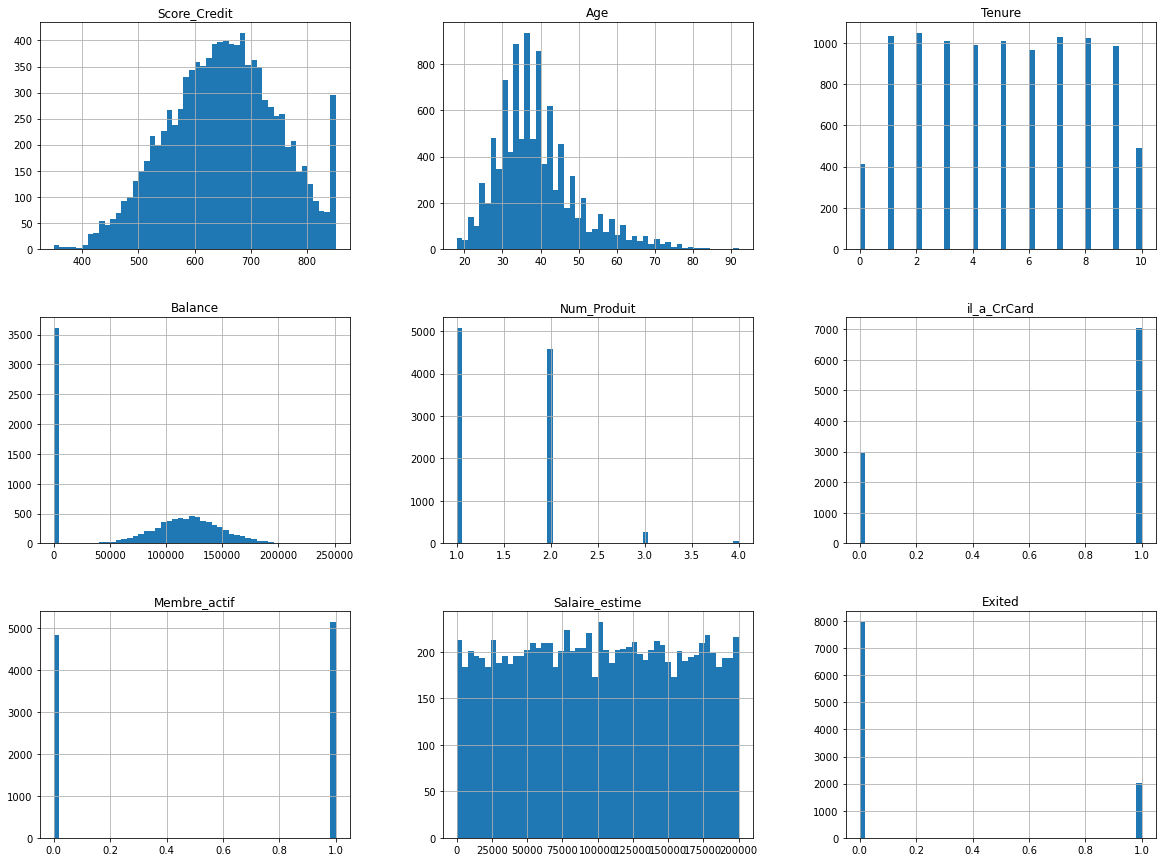

In [86]:
import matplotlib.pyplot as plt
taux.hist(bins=50, figsize=(20,15))
plt.show()

In [87]:
pearsoncorr = taux.corr(method='pearson')
pearsoncorr

,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
Score_Credit,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num_Produit,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
il_a_CrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Membre_actif,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Salaire_estime,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# CONCLUSION

Le modele du Random Forest semble le plus pertinant de tous les modèles que nous avons expérimenté avec un score de 0,85 pour le jeu de test.
